# Assignment 6: Knock Airport Weather

## Part 1: Approach
1. Read in the data set from csv
2. Plot the temperature (using the turn of each year in the dataset as the scope)
3. Plot the mean temperature each day (using the month of February 1998 as the scope)
4. Plot the mean temperature for each month (using the year 2004 as the scope)

Note: since this data set stretches over 28 years, I will just be taking samples of the dataset for each subtask.

In [9]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read in data, skipping first 23 rows as these just contain information about the data set.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head()


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/3311346703.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


### Plot Temperature
For this task, I will take the temperature from 1 January each year at midnight.

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/1646392019.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timestamp = pd.to_datetime(df['date'])
/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/1646392019.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddata['year'] = timestamp[filtereddata.index].dt.year


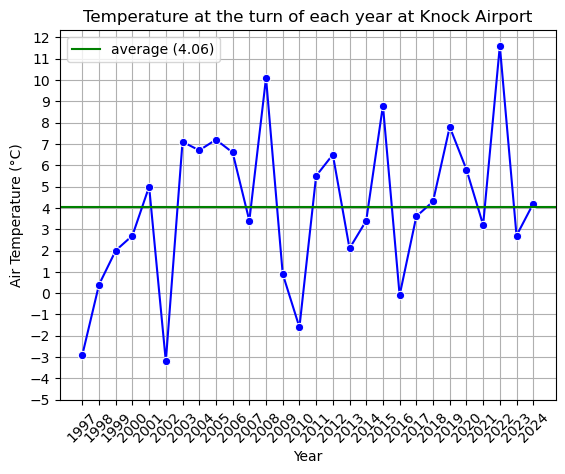

In [28]:


# First we make sure the timestamps are correctly in date-time format to be able to easily manipulate them.
timestamp = pd.to_datetime(df['date'])

# We then filter the dafa frame for January 1st at midnight each year (influxdata, 2023)
filtereddata = df[(timestamp.dt.month == 1) & 
                 (timestamp.dt.day == 1) & 
                 (timestamp.dt.hour == 0) & 
                 (timestamp.dt.minute == 0) & 
                 (timestamp.dt.second == 0)]

# We add a 'year' column to the filtered data frame
filtereddata['year'] = timestamp[filtereddata.index].dt.year

# Now we plot the temperature against the extracted year.
year = filtereddata['year']
temp = filtereddata['temp']
sns.lineplot(x=year, y=temp, marker='o', color='blue')

plt.title("Temperature at the turn of each year at Knock Airport")
plt.xlabel("Year")
plt.ylabel("Air Temperature (°C)")
plt.xticks(year, rotation=45)
plt.yticks(np.arange(-5, 13, 1))
plt.grid()

avgtemp = temp.mean()
plt.axhline(avgtemp, color='g', label=f"average ({avgtemp:.2f})")

plt.legend()
plt.show()



### Mean temperature each day of the month
For this, I will use a specific month of interest to me, February 1998.

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/4122461005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_febninetyeight['day'] = timestamp[filtered_febninetyeight.index].dt.day


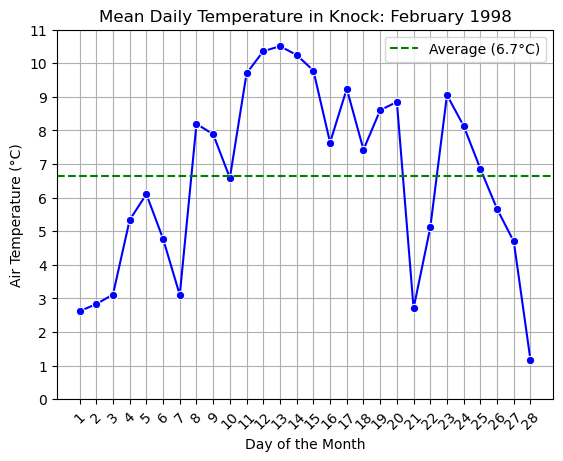

In [29]:
filtered_febninetyeight = df[(timestamp.dt.year == 1998) & 
                (timestamp.dt.month == 2)]

filtered_febninetyeight['day'] = timestamp[filtered_febninetyeight.index].dt.day
dailymean = filtered_febninetyeight.groupby('day')['temp'].mean()


days = dailymean.index
temp = dailymean.values


sns.lineplot(x=days, y=temp, marker='o', color='b')

plt.title("Mean Daily Temperature in Knock: February 1998")
plt.xlabel("Day of the Month")
plt.ylabel("Air Temperature (°C)")
plt.xticks(np.arange(1,29,1), rotation=45)
plt.yticks(np.arange(int(temp.min()) - 1, int(temp.max()) + 2, 1))
plt.grid()

avgtemp = temp.mean()
plt.axhline(avgtemp, color='g', linestyle='--', label=f"Average ({avgtemp:.1f}°C)")

plt.legend()

plt.show()









### Mean Monthly Temperature
For this, I will use the year 2004 and get the monthly mean.

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2053667933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_twothousandandfour['month'] = timestamp[filtered_twothousandandfour.index].dt.month


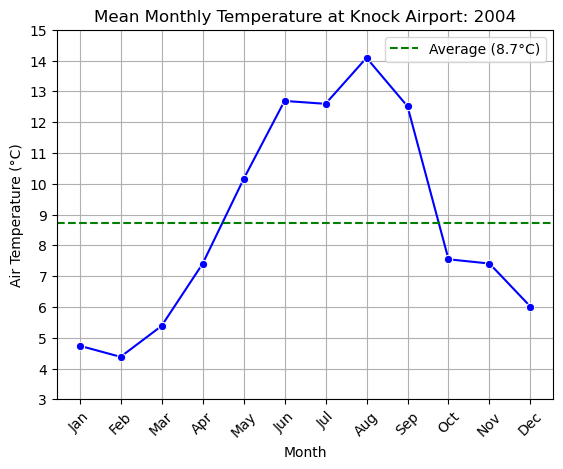

In [ ]:
filtered_twothousandandfour = df[(timestamp.dt.year == 2004)]

filtered_twothousandandfour['month'] = timestamp[filtered_twothousandandfour.index].dt.month
monthlymean = filtered_twothousandandfour.groupby('month')['temp'].mean() # .groupby method taken from Geeks for Geeks (2024)


months = monthlymean.index
temp = monthlymean.values


sns.lineplot(x=months, y=temp, marker='o', color='b')

plt.title("Mean Monthly Temperature at Knock Airport: 2004")
plt.xlabel("Month")
plt.ylabel("Air Temperature (°C)")
plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45) #(OpenAI, 2024: response to a query about manually setting the labels for ticks)
plt.yticks(np.arange(int(temp.min()) - 1, int(temp.max()) + 2, 1))
plt.grid()

avgtemp = temp.mean()
plt.axhline(avgtemp, color='g', linestyle='--', label=f"Average ({avgtemp:.1f}°C)")

plt.legend()

plt.show()

## Part 2 (Advanced Tasks): Approach
Here I will aim to plot:
1. The windspeed (using the turn of each year in the dataset as the scope)
2. The rolling windspeed over 24 hours (using 12 February 1998 as the scope)
3. The max windspeed per day (using January 2000 as the scope)
4. The monthly mean of the daily max windspeed (using the year 2000 as the scope).

### Plot Windspeed

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/3320281226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddata['wdsp'] = pd.to_numeric(filtereddata['wdsp'], errors='coerce') # we can see from previewing the data that windspeed is stored as an object, so we need to convert it to a numeric type in order to manipulate it.


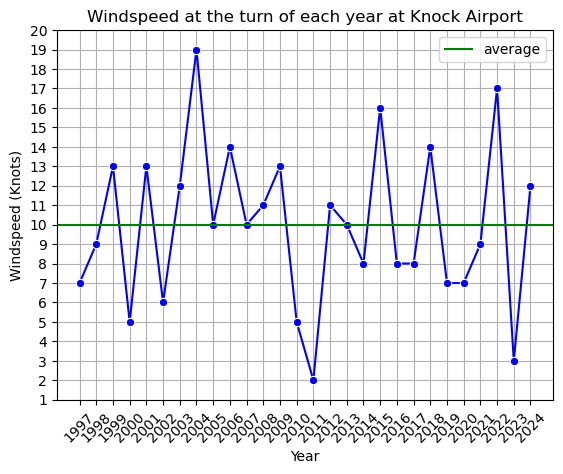

In [32]:
# since I'm using the same filtered data as the first subtask, I don't need to include the top part again

filtereddata['wdsp'] = pd.to_numeric(filtereddata['wdsp'], errors='coerce') # we can see from previewing the data that windspeed is stored as an object, so we need to convert it to a numeric type in order to manipulate it.
filtereddata = filtereddata.dropna(subset=['wdsp']) # we know some values are missing, so we will drop the rows that have no data. However, in this case it's more of a precaution as none of the years are missing windspeed data for the time we're looking at.

year = filtereddata['year']
windspeed = filtereddata['wdsp']
sns.lineplot(x=year, y=windspeed, marker='o', color='blue')

plt.title("Windspeed at the turn of each year at Knock Airport")
plt.xlabel("Year")
plt.ylabel("Windspeed (Knots)")
plt.xticks(year, rotation=45)
plt.yticks(np.arange(windspeed.min() - 1, windspeed.max() + 2, 1))
plt.grid()

avgwind = windspeed.mean()
plt.axhline(avgwind, color='g', label="average")

plt.legend()
plt.show()

### Rolling Windspeed (12 February 1998)


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/1710089764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_twelfthfebninetyeight['hour'] = timestamp[filtered_twelfthfebninetyeight.index].dt.hour


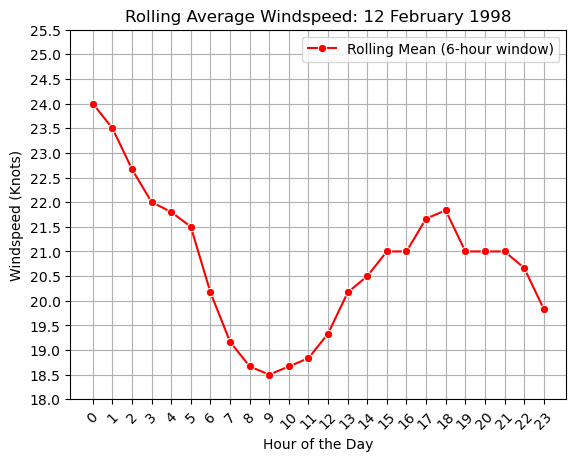

In [33]:
filtered_twelfthfebninetyeight = df[(timestamp.dt.year == 1998) & 
                                     (timestamp.dt.month == 2) & 
                                     (timestamp.dt.day == 12)]

filtered_twelfthfebninetyeight['hour'] = timestamp[filtered_twelfthfebninetyeight.index].dt.hour

hour = filtered_twelfthfebninetyeight['hour']
rollingwindspeed = filtered_twelfthfebninetyeight['wdsp'].rolling(window=6, min_periods=1).mean() #calculating the rolling windspeed with 6 hours as the window, using information on the rolling() function from ChatGPT and Programiz (https://www.programiz.com/python-programming/pandas/methods/rolling)


sns.lineplot(x=hour, y=rollingwindspeed, marker="o", label='Rolling Mean (6-hour window)', color='red')

plt.title("Rolling Average Windspeed: 12 February 1998")
plt.xlabel("Hour of the Day")
plt.xticks(np.arange(0,24,1), rotation=45)
plt.yticks(np.arange(18,26,0.5))
plt.ylabel("Windspeed (Knots)")
plt.grid()
plt.legend()
plt.show()



### Max Windspeed per Day (January 2000)

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2522333728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jantwothousand['wdsp'] = pd.to_numeric(filtered_jantwothousand['wdsp'], errors='coerce')
/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2522333728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jantwothousand['day'] = timestamp[filtered_jantwothousand.index].dt.day
/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2522333728.py:1

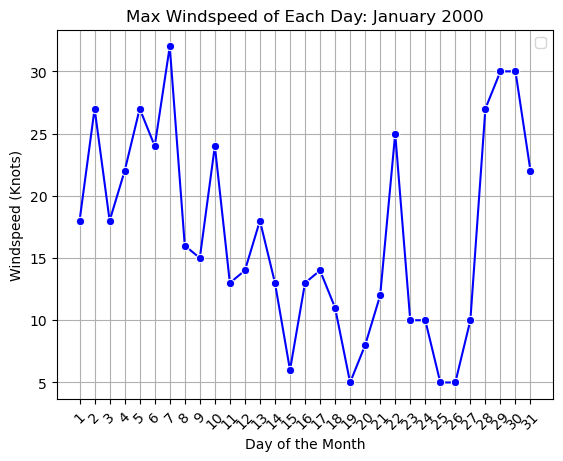

In [22]:
filtered_jantwothousand = df[(timestamp.dt.year == 2000) & 
                              (timestamp.dt.month == 1)]

filtered_jantwothousand['wdsp'] = pd.to_numeric(filtered_jantwothousand['wdsp'], errors='coerce')
filtered_jantwothousand['day'] = timestamp[filtered_jantwothousand.index].dt.day

dailymax = filtered_jantwothousand.groupby('day')['wdsp'].max()

jandays = dailymax.index
janwindspeed = dailymax.values

sns.lineplot(x=jandays, y=janwindspeed, marker='o', color='b')
plt.title("Max Windspeed of Each Day: January 2000")
plt.xlabel("Day of the Month")
plt.ylabel("Windspeed (Knots)")
plt.xticks(np.arange(1, 32, 1), rotation=45)
plt.grid()
plt.legend()
plt.show()


### Average Max Daily Windspeed per month

16.903225806451612
21.620689655172413
14.64516129032258
14.133333333333333
14.258064516129032
13.666666666666666
11.387096774193548
11.03225806451613
13.333333333333334
19.516129032258064
17.766666666666666
15.612903225806452
[16.903225806451612, 21.620689655172413, 14.64516129032258, 14.133333333333333, 14.258064516129032, 13.666666666666666, 11.387096774193548, 11.03225806451613, 13.333333333333334, 19.516129032258064, 17.766666666666666, 15.612903225806452]


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2968769247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddata_twothousand['wdsp'] = pd.to_numeric(filtereddata_twothousand['wdsp'], errors='coerce')
/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2968769247.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddata_twothousand['day'] = timestamp[filtereddata_twothousand.index].dt.day
/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1971/2968769247.

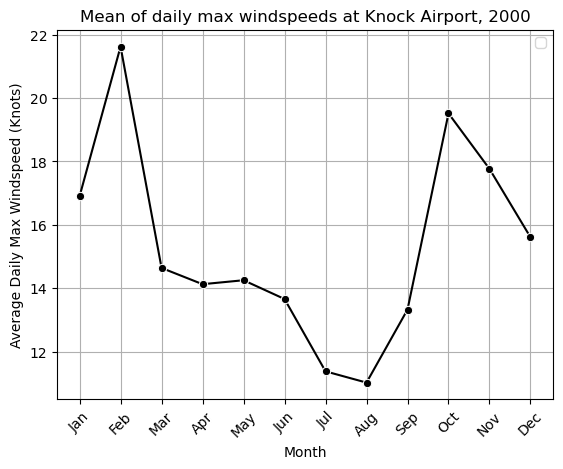

In [ ]:
monthlymeans = [] #Initiate an array where we'll store the means

for month in range(1,13):
    filtereddata_twothousand = df[(timestamp.dt.year == 2000) & 
                       (timestamp.dt.month == month)]
    
    filtereddata_twothousand['wdsp'] = pd.to_numeric(filtereddata_twothousand['wdsp'], errors='coerce')
    filtereddata_twothousand['day'] = timestamp[filtereddata_twothousand.index].dt.day

    dailymaxwindspeed = filtereddata_twothousand.groupby('day')['wdsp'].max()
    avgmonthlymax = dailymaxwindspeed.mean()
    print(avgmonthlymax)
    monthlymeans.append(avgmonthlymax)

print(monthlymeans) 
# So, we now have an array with the monthly mean of the daily max windspeeds. Now we just need to plot this.


sns.lineplot(x=range(1,13), y=monthlymeans, marker="o", color='black')
plt.title("Mean of daily max windspeeds at Knock Airport, 2000")
plt.xlabel("Month")
plt.ylabel("Average Daily Max Windspeed (Knots)")
plt.xticks(np.arange(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45) 
plt.grid()
plt.legend()
plt.show()


## References
- OpenAI (2024) ChatGPT [Accessed 16 December 2024]. Available at: https://chat.openai.com
- GeeksforGeeks (2024). *Pandas dataframe.groupby() Method*. Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ [Accessed 15 December 2024].
- Influxdata (2023). *Pandas DateTime: When and How to Use It*. Available at: https://www.influxdata.com/blog/pandas-datetime-tutorial/ [Accessed 7 November 2024].
- Programiz (2024). *Pandas rolling()*. Available at: https://www.programiz.com/python-programming/pandas/methods/rolling [Accessed 15 December 2024].